In [47]:
# 필요한 모듈 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# 데이터 파일 불러오기

mv_train = pd.read_csv('./movies_train.csv')
mv_test = pd.read_csv('./movies_test.csv')

In [49]:
# 불러온 데이터 확인

mv_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


In [50]:
mv_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
title             600 non-null object
distributor       600 non-null object
genre             600 non-null object
release_time      600 non-null object
time              600 non-null int64
screening_rat     600 non-null object
director          600 non-null object
dir_prev_bfnum    270 non-null float64
dir_prev_num      600 non-null int64
num_staff         600 non-null int64
num_actor         600 non-null int64
box_off_num       600 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [51]:
mv_train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [52]:
#결측치 확인

mv_train[mv_train['dir_prev_bfnum'].isnull()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,nan,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,nan,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,nan,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,nan,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,nan,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,nan,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,nan,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,nan,0,431,4,2192525


In [53]:
mv_train[mv_train['dir_prev_bfnum'].isnull()]['dir_prev_num'].sum() #다 전작이 없어서 관객수 못구하니까 nan인듯

0

In [54]:
#결측치 처리

mv_train.dir_prev_bfnum.fillna(0, inplace=True)
mv_test.dir_prev_bfnum.fillna(0, inplace=True)

In [55]:
pd.options.display.float_format = '{:.1f}'.format #scientific notation 없애기

In [10]:
# 특성별 상관계수 확인

corr = mv_train.corr()
corr

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.0,0.3,0.3,0.6,0.1,0.4
dir_prev_bfnum,0.3,1.0,0.4,0.4,0.0,0.3
dir_prev_num,0.3,0.4,1.0,0.5,0.0,0.3
num_staff,0.6,0.4,0.5,1.0,0.1,0.5
num_actor,0.1,0.0,0.0,0.1,1.0,0.1
box_off_num,0.4,0.3,0.3,0.5,0.1,1.0


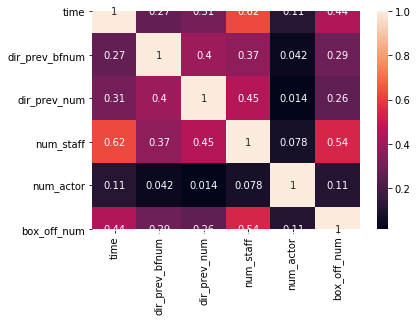

In [11]:
# 상관계수 시각화

sns.heatmap(corr, annot=True)

In [12]:
#배우의 수는 결과랑 큰 상관 없어보임
# 결과랑 상관있는거-> 시간, 스태프 수
# 시간이랑 스태프 수가 서로 상관관계있음 -> 둘중 하나 선택할것
# 스태프랑 전작개수도 상관있어보임
# 전작수랑 전작 관객수도 상관있어보임

In [13]:
# 장르별 관객수 확인

pd.DataFrame(mv_train.groupby(['genre'])['box_off_num'].mean()).sort_values(by=['box_off_num'],ascending=False)

,box_off_num
genre,
느와르,2263695.1
액션,2203974.1
SF,1788345.7
코미디,1193914.0
드라마,625689.8
공포,590832.5
미스터리,527548.2
멜로/로맨스,425968.0
애니메이션,181926.7


In [14]:
mv_train.distributor.unique() #<- 얘는 좀 감이안오네,, 이거 처리 어떻게 하냐

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [15]:
# 개봉 연도, 개봉월 컬럼 생성

rel_yr=[]
rel_mn=[]
for i in range(0,len(mv_train)):
    rel_yr.append(int(mv_train['release_time'][i][2:4]))
    rel_mn.append(int(mv_train['release_time'][i][5:7]))
mv_train['rel_yr']= rel_yr
mv_train['rel_mn']= rel_mn

rel_yrt=[]
rel_mnt=[]
for i in range(0,len(mv_test)):
    rel_yrt.append(int(mv_test['release_time'][i][2:4]))
    rel_mnt.append(int(mv_test['release_time'][i][5:7]))
mv_test['rel_yr']= rel_yrt
mv_test['rel_mn']= rel_mnt

In [16]:
mv_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,rel_yr,rel_mn
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,12,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,15,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,13,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,12,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,10,11


In [17]:
# 개봉 연도별 관객수 확인

pd.DataFrame(mv_train.groupby(['rel_yr'])['box_off_num'].mean()).sort_values(by=['box_off_num'],ascending=False)

,box_off_num
rel_yr,
13,1007357.8
12,945725.2
11,628867.1
15,595869.2
14,593884.5
10,541658.2


In [18]:
# 개봉월별 관객수 확인

pd.DataFrame(mv_train.groupby(['rel_mn'])['box_off_num'].mean()).sort_values(by=['box_off_num'],ascending=False)

,box_off_num
rel_mn,
1,1365930.6
12,1288247.7
7,1113807.2
8,1029161.7
9,731528.6
2,663025.2
5,575685.2
6,512286.5
11,495653.9


In [19]:
# 감독별 관객수 확인

pd.DataFrame(mv_train.groupby(['director'])['box_off_num'].mean()).sort_values(by=['box_off_num'],ascending=False)

,box_off_num
director,
윤제균,14262766.0
최동훈,12845252.0
양우석,11374879.0
봉준호,9350351.0
한재림,9135806.0
...,...
진광교,36.0
이세일,10.0
고구마,8.0


In [20]:
# 감독이름 set으로 만들기

dirname = list(mv_train['director'])
dirname.append(mv_test['director'])

In [21]:
dirname = []
for i in range(len(mv_train)):
    dirname.append(mv_train['director'][i])
for j in range(len(mv_test)):
    dirname.append(mv_test['director'][j])
dirname = set(dirname)
dirname = list(dirname)

In [22]:
# 기존 데이터에 감독 이름별 컬럼 생성하기

for i in dirname:
    dir_list = []
    for j in range(len(mv_train)):
        if mv_train['director'][j]==i:
            dir_list.append(1)
        else:
            dir_list.append(0)
    mv_train[i] = dir_list

In [23]:
for i in dirname:
    dir_list = []
    for j in range(len(mv_test)):
        if mv_test['director'][j]==i:
            dir_list.append(1)
        else:
            dir_list.append(0)
    mv_test[i] = dir_list

In [24]:
mv_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,...,김경묵,김일란,라희찬,봉준호,김경식,정성복,김관철,유선동,배광수,김지용
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,...,0,0,0,0,0,0,0,0,0,0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,...,0,0,0,0,0,0,0,0,0,0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,...,0,0,0,0,0,0,0,0,0,0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,...,0,0,0,0,0,0,0,0,0,0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,...,0,0,0,0,0,0,0,0,0,0


In [25]:
len(dirname)

614

In [26]:
# one hot encoding

encoding = pd.get_dummies(data = mv_train, columns = ['genre'], prefix = 'genre')
encoding = pd.get_dummies(data = encoding, columns = ['screening_rat'], prefix = 'screening_rat')

In [27]:
encoding_test = pd.get_dummies(data = mv_test, columns = ['genre'], prefix = 'genre')
encoding_test = pd.get_dummies(data = encoding_test, columns = ['screening_rat'], prefix = 'screening_rat')

In [28]:
# 개봉 일자 특성 삭제(개봉 연,월 컬럼으로 대신함)

mv_train = encoding.drop(['release_time'],axis=1)
mv_test = encoding_test.drop(['release_time'],axis=1)

In [43]:
# 데이터 준비: X,y 분할하기

X = mv_train.drop(['title','box_off_num','director','distributor'],axis=1)
y = mv_train['box_off_num']
X_test = mv_test.drop(['title','director','distributor'],axis=1)

#학습용 데이터와 검증용 데이터로 분할하기

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)

In [39]:
# 훈련데이터, 테스트 데이터 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [40]:
# 평가 함수 정의
from sklearn.metrics import r2_score, mean_squared_error

def evaluate_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("mse: {:.3f}".format(mse))
    print("rmse: {:.3f}".format(rmse))
    print("r2: {:.3f}".format(r2))
    
    return

In [41]:
# SGD regressor 사용
from sklearn.linear_model import SGDRegressor

# 객체 생성
sgd_reg = SGDRegressor(max_iter =1000, eta0=0.01)

# 학습
sgd_reg.fit(X_train_scaled, y_train)

# 회귀 계수 및 절편
print(sgd_reg.coef_[0], sgd_reg.intercept_)

# 성능평가
y_train_pred = sgd_reg.predict(X_train_scaled)
y_val_pred = sgd_reg.predict(X_val_scaled)
evaluate_score(y_train, y_train_pred)
evaluate_score(y_val, y_val_pred)

-153786.1061969408 [769106.49986837]
mse: 201154688205.449
rmse: 448502.718
r2: 0.951
mse: 2930077391491.699
rmse: 1711746.883
r2: -0.861


In [42]:
#제출 파일 생성

y_pred = sgd_reg.predict(X_test_scaled)


submission = pd.DataFrame(mv_test['title'])
submission['box_off_num'] = y_pred

submission.to_csv('./submission.csv', index=False)

### 최종 점수: RMSE 2140023.594794141	